# 《Python数据分析》第2次作业

## 说明：本次作业将使用好莱坞（2007-2011）的电影数据进行可视化。本次作业没有“标准答案”，请使用你认为最合理的方式进行可视化，并对结果进行描述和解读。可以使用matplotlib和（或）seaborn，或者其他你喜欢的Python可视化包。

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.patches import ConnectionPatch
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False
df2007 = pd.read_csv("第二次作业数据集\Most Profitable Hollywood Stories - US 2007.csv")
df2008 = pd.read_csv("第二次作业数据集\Most Profitable Hollywood Stories - US 2008.csv")
df2009 = pd.read_csv("第二次作业数据集\Most Profitable Hollywood Stories - US 2009.csv")
df2010 = pd.read_csv("第二次作业数据集\Most Profitable Hollywood Stories - US 2010.csv")
df2011 = pd.read_csv("第二次作业数据集\Most Profitable Hollywood Stories - US 2011.csv")
df2011

,Film,Lead Studio,Rotten Tomatoes %,Audience score %,Story,Genre,Number of Theatres in US Opening Weekend,Box Office Average per US Cinema (Opening Weekend),Domestic Gross,Foreign Gross,Worldwide Gross,Budget,Profitability,Opening Weekend,Oscar,Bafta,Source
0,30 Minutes or Less,Independent,43,48,Comedy,Comedy,2888,4616,37.05,3.49,40.55,28,144.81%,13.33,NaN,NaN,http://boxofficemojo.com/movies/?id=30minuteso...
1,50/50,Independent,93,93,Discovery,Comedy,2458,3517,34.90,1.62,36.51,8,456.39%,8.64,NaN,NaN,http://boxofficemojo.com/movies/?id=50fifty.htm
2,A Dangerous Method,Independent,79,89,Love,Drama,NaN,NaN,0.54,8.44,8.97,20,44.86%,0.17,NaN,NaN,http://boxofficemojo.com/movies/?id=dangerousm...
3,A Very Harold and Kumar Christmas,Lionsgate,72,71,Comedy,Comedy,2875,4506,34.04,??,34.04,19,179.18%,12.95,NaN,NaN,http://boxofficemojo.com/movies/?id=haroldandk...
4,Abduction,Vertigo Entertainment,4,46,Maturation,Action,3118,3504,28.07,54.00,82.07,35,234.48%,10.93,NaN,NaN,http://boxofficemojo.com/movies/?id=abduction1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Winnie The Pooh,Disney,91,79,Quest,Animation,2405,3267,26.69,6.46,33.15,30,110.51%,7.86,NaN,NaN,http://boxofficemojo.com/movies/?id=winniethep...
146,X-Men: First Class,Disney,87,88,Monster Force,Action,3641,15134,146.41,207.22,353.62,160,221.01%,55.10,NaN,NaN,http://boxofficemojo.com/movies/?id=xmenfirstc...
147,Your Highness,Universal,26,36,Comedy,Comedy,2769,3380,21.60,3.26,24.86,49.9,49.81%,9.36,NaN,NaN,http://boxofficemojo.com/movies/?id=yourhighne...
148,Zookeeper,Happy Madison Productions,14,42,Comedy,Comedy,3482,5763,80.36,89.94,170.30,80,212.88%,20.07,NaN,NaN,http://boxofficemojo.com/movies/?id=zookeeper.htm


### 第1题：请使用2011年的数据（即Most Profitable Hollywood Stories - US 2011.csv），对Domestic Gross这个变量的分布进行可视化，并对可视化结果进行简单描述。（2分）

评分要点：（1）可视化是否正确；（2）构图等可视化元素是否合适（包括但并不限于布局、尺度、颜色、标记与线条等，下同）；（3）可视化结果描述是否合理和到位。

In [17]:
df2011["Domestic Gross"].isnull().sum() #经验证domestic gross中没有缺失值
# print(df2011.groupby("Lead Studio")["Film "].count()) #可以清晰看到有很多同样但是以不同形式命名的公司，对他们的名字做统一
# df2011n = df2011.rename(columns={"Film ":"Film"}) #对列名"Film "进行处理
#以下对不同形式命名的同公司做整合处理
df2011["Lead Studio"]=df2011["Lead Studio"].replace(to_replace=["DreamWorks ","DreamWorks Animation","DreamWorks Pictures"],value="DreamWorks")
df2011["Lead Studio"]=df2011["Lead Studio"].replace(to_replace=["Happy Madison Productions"],value="Happy Madison")
df2011["Lead Studio"]=df2011["Lead Studio"].replace(to_replace=["Sony Pictures Animation"],value="Sony")
df2011["Lead Studio"]=df2011["Lead Studio"].replace(to_replace=["Warner Bros."],value="Warner Bros")
df2011["Lead Studio"]=df2011["Lead Studio"].replace(to_replace=["Relativity ","Relativity"],value="Relativity Media")
df2011["Domestic Gross"] = pd.to_numeric(df2011["Domestic Gross"],errors="coerce")
# print(df2011n["Lead Studio"].unique()) #整合时用来看真正的命名

#对可视化做数据预处理
# dataStudioDomesticGross = df2011n.groupby("Lead Studio")["Domestic Gross"].sum()
# Studio = dataStudioDomesticGross.index
# print(dataStudioDomesticGross)
# print(dataStudioDomesticGross.index)
# plt.scatter(np.arange(100),[])


#对可视化做数据预处理
dataStudioDomesticGross = df2011.groupby("Lead Studio")["Domestic Gross"].sum().sort_values(ascending=True)

Studio = dataStudioDomesticGross.index
# print(dataStudioDomesticGross.index)
# print(dataStudioDomesticGross)

<function matplotlib.pyplot.show(close=None, block=None)>

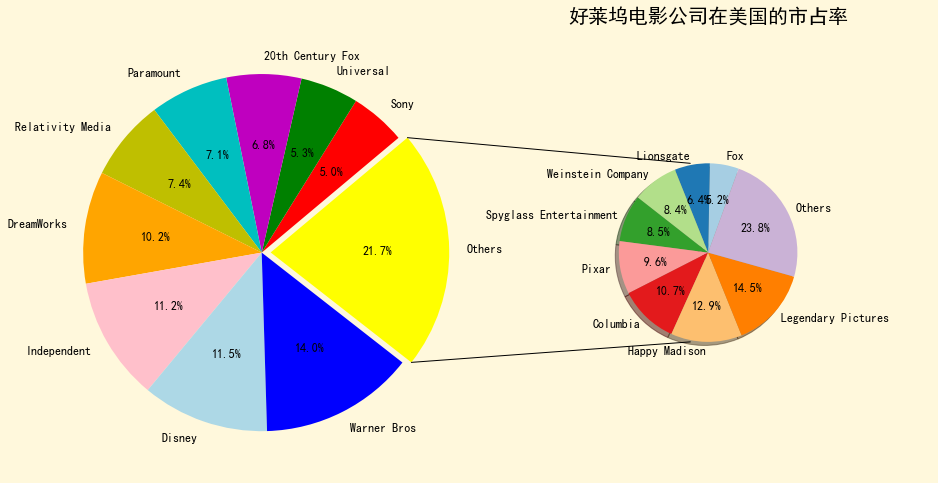

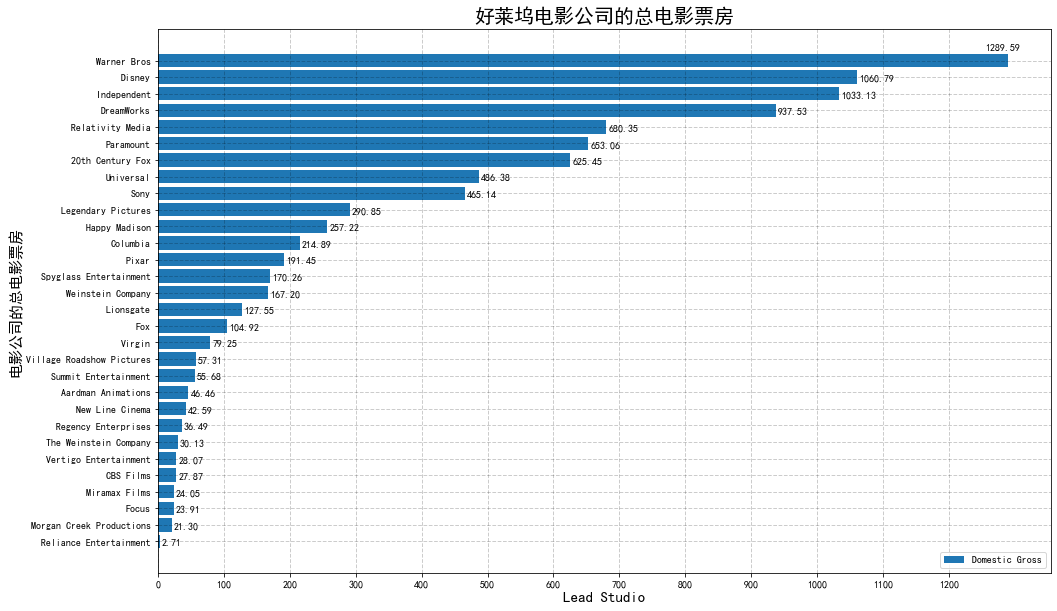

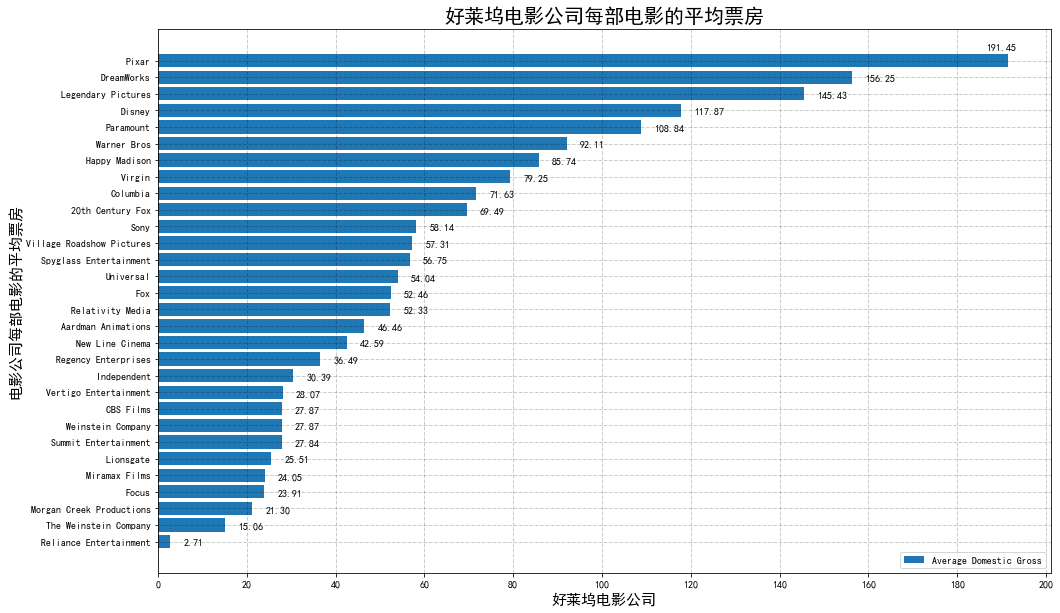

In [18]:
dataStudioDomesticGross1 = df2011.groupby("Lead Studio")["Domestic Gross"].sum().sort_values(ascending=True).to_frame()
# Studio = dataStudioDomesticGross.index

#大饼图数据
# dataStudioDomesticGross.index.get_loc("Legendary Pictures") 用来拿低过5%的定位
othersvalue = dataStudioDomesticGross1[:21].sum()
pieValue1 =dataStudioDomesticGross1[21:].append(othersvalue,ignore_index=True) #把低于5%的数据变成其他
Studio1 = Studio[21:].append(pd.Index(["Others"])) #加入其他作为index

#在小饼中低于5%的公司
dataStudioDomesticGross1.index.get_loc("Virgin")
dataStudioDomesticGross1[0:13]
othersvalue1 = dataStudioDomesticGross1[:13].sum()
pieValue2 = dataStudioDomesticGross1[13:21].append(othersvalue1,ignore_index=True) #把低于5%的数据变成其他
Studio2 = Studio[13:21].append(pd.Index(["Others"])) #加入其他作为index



#画布
fig = plt.figure(figsize=(16, 15),
                 facecolor='cornsilk'
                )
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

#大饼图
labs = Studio1
quantity = pieValue1["Domestic Gross"]
explode = (0, 0, 0, 0,0,0,0,0,0, 0.05)    # 分裂距离

ax1.pie(quantity,
        colors=['r', 'g', 'm', 'c', 'y','orange',"pink","lightblue","b","yellow"],
        explode=explode,
        autopct='%1.1f%%',
        startangle=40,
        labels=labs,
        textprops={'color': 'k',
                   'fontsize': 12,
                  }
       )

#小饼图
labs2 = Studio2
quantity_2 = pieValue2["Domestic Gross"]

ax2.pie(x=quantity_2,
        colors=plt.cm.Paired(np.linspace(0,1,12)),
        autopct='%1.1f%%',
        startangle=70,
        labels=labs2,
        radius=0.5,
        shadow=True,
        textprops={'color': 'k',
                   'fontsize': 12,
                  },
       )

plt.title("好莱坞电影公司在美国的市占率",fontsize=20)
# 用 ConnectionPatch 画出两个饼图的间连线
# 饼图边缘的数据
theta1 = ax1.patches[-1].theta1
theta2 = ax1.patches[-1].theta2
center = ax1.patches[-1].center
r = ax1.patches[-1].r

width=0.2
# 上边缘的连线
x = r*np.cos(np.pi/180*theta2)+center[0]
y = np.sin(np.pi/180*theta2)+center[1]
con_a = ConnectionPatch(xyA=(-width/2,0.5), xyB=(x,y),
                        coordsA='data', coordsB='data',
                        axesA=ax2, axesB=ax1
                       )

# 下边缘的连线
x = r*np.cos(np.pi/180*theta1)+center[0]
y = np.sin(np.pi/180*theta1)+center[1]
con_b = ConnectionPatch(xyA=(-width/2,-0.5), xyB=(x,y),
                        coordsA='data', coordsB='data',
                        axesA=ax2, axesB=ax1
                       )

for con in [con_a, con_b]:
    con.set_linewidth(1)    # 连线宽度
    con.set_color=([0,0,0])    # 连线颜色
    ax2.add_artist(con)   # 添加连线
    
# plt.legend(labels=labs2,bbox_to_anchor=(1.2,1))

# plt.subplot
plt.figure(figsize=(16,10))
plt.barh(Studio,dataStudioDomesticGross,label="Domestic Gross",align="center")
for index, value in enumerate(dataStudioDomesticGross):
    if index == 29:
        plt.text(value-35, index+0.6, str("%.2f"%value),fontsize=10)
    else:
        plt.text(value+3, index-0.25, str("%.2f"%value),fontsize=10)
plt.xlabel("Lead Studio",fontsize=15)
plt.ylabel("电影公司的总电影票房",fontsize=15)
plt.title("好莱坞电影公司的总电影票房",fontsize=20)
plt.legend(loc="lower right")
plt.xticks(np.linspace(0,1200,13))
plt.grid(c="k",ls="--",lw=1,alpha=0.2)
plt.show


#平均Domestic Gross柱形图
# dataStudioDomesticGross = df2011.groupby("Lead Studio")["Domestic Gross"].sum().sort_values(ascending=True)
dataStudioNum = df2011.groupby("Lead Studio").size()
AverageDG = dataStudioDomesticGross/dataStudioNum
sortedAverageDG = AverageDG.sort_values(ascending=True)
plt.figure(figsize=(16,10))
plt.barh(sortedAverageDG.index,sortedAverageDG,label="Average Domestic Gross",align="center")
for index, value in enumerate(sortedAverageDG):
    if index == 29:
        plt.text(value-5, index+0.6, str("%.2f"%value),fontsize=10)
    else:
        plt.text(value+3, index-0.25, str("%.2f"%value),fontsize=10)
plt.xlabel("好莱坞电影公司",fontsize=15)
plt.ylabel("电影公司每部电影的平均票房",fontsize=15)
plt.title("好莱坞电影公司每部电影的平均票房",fontsize=20)
plt.legend(loc="lower right")
plt.xticks(np.linspace(0,200,11))
plt.grid(c="k",ls="--",lw=1,alpha=0.2)
plt.show

In [19]:
print("依据每家公司所出产的电影在当年的总Domestic Gross中所占据的比例可以知道美国当地的影视市场是较为集中的，\
有67.1%的市场份额集中在以Warner Bros为首的8家公司中，独立人所出产的电影在当地也有11.2%的市占率，\
其余21.7%则是分别被以Legendary Pictures为首的21家公司瓜分，依照每个公司的平均Domestic Gross来看他们在当地的受众度\
可以发现DreamWorks，Disney，Paramount同时处在总Domestic Gross（排除独立人）和平均Domestic Gross的前5名。\n")

print("因此可以推论这三家公司所出产的影片质量是有保证的，他们在维持影片出产量的同时也能维持影片质量，而在占据美国市场份额最多的Warner Bros\
在平均Dosmestic Gross上的表现就不如人意，仅排在第6名，他的高市场份额更多的是以影片数量堆积起来的，相对于前三者而言，其影片质量相对较难保证\n")

print("另外在平均Domestic Gross的图上我们也可以看到Pixar位列第一，1年仅出产1部电影却可以在唯一一部上取得如此耀眼的成绩，可以推测这家公司\
是重视质量多过数量的，消费者也可以对Pixar公司后续发布的电影保持关注，相信会看到不错的电影内容。")



依据每家公司所出产的电影在当年的总Domestic Gross中所占据的比例可以知道美国当地的影视市场是较为集中的，有67.1%的市场份额集中在以Warner Bros为首的8家公司中，独立人所出产的电影在当地也有11.2%的市占率，其余21.7%则是分别被以Legendary Pictures为首的21家公司瓜分，依照每个公司的平均Domestic Gross来看他们在当地的受众度可以发现DreamWorks，Disney，Paramount同时处在总Domestic Gross（排除独立人）和平均Domestic Gross的前5名。

因此可以推论这三家公司所出产的影片质量是有保证的，他们在维持影片出产量的同时也能维持影片质量，而在占据美国市场份额最多的Warner Bros在平均Dosmestic Gross上的表现就不如人意，仅排在第6名，他的高市场份额更多的是以影片数量堆积起来的，相对于前三者而言，其影片质量相对较难保证

另外在平均Domestic Gross的图上我们也可以看到Pixar位列第一，1年仅出产1部电影却可以在唯一一部上取得如此耀眼的成绩，可以推测这家公司是重视质量多过数量的，消费者也可以对Pixar公司后续发布的电影保持关注，相信会看到不错的电影内容。


### 第2题：请使用2011年的数据（即Most Profitable Hollywood Stories - US 2011.csv），Number of Theatres in US Opening Weekend和Domestic Gross两个变量关系如何？请针对于它们之间的关系进行可视化，并对可视化结果进行简单描述。（2分）
温馨提示：可视化之前可能需要处理空缺值。处理空缺值的方式可自行定义并说明理由，言之成理即可。
评分要点：（1）处理缺失值的方式及理由；（2）可视化是否正确；（3）构图等可视化元素是否合适；（4）可视化结果描述是否合理和到位。

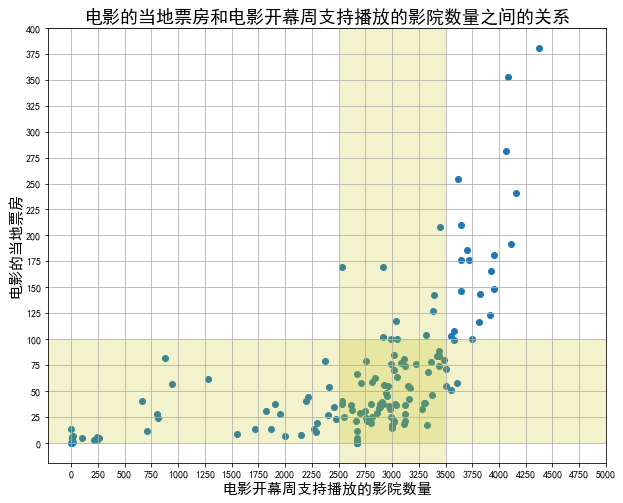

In [20]:
df2011["Number of Theatres in US Opening Weekend"] = pd.to_numeric(df2011["Number of Theatres in US Opening Weekend"],errors="coerce")
df2011["Number of Theatres in US Opening Weekend"].isnull().sum()   #14个空缺值
meanTheatre = df2011["Number of Theatres in US Opening Weekend"].mean()   #平均值

#用平均值填充空缺因为这样不会影响数据的集中度,以最大概率的可能来为缺失值做填补
df2011["Number of Theatres in US Opening Weekend"].fillna(meanTheatre,inplace=True) 

# plt.plot(df2011.index,df2011n["Number of Theatres in US Opening Weekend"])
# plt.plot(df2011.index,df2011n["Domestic Gross"])
plt.figure(figsize=(10,8))
a = df2011["Domestic Gross"]
b = df2011["Number of Theatres in US Opening Weekend"]
plt.scatter(b,a,)
plt.ylabel("电影的当地票房",fontsize=15)
plt.xlabel("电影开幕周支持播放的影院数量",fontsize=15)
plt.title("电影的当地票房和电影开幕周支持播放的影院数量之间的关系",fontsize=18)
plt.axvspan(xmin=2500,xmax=3500,facecolor="y",alpha=0.2)
plt.axhspan(ymin=0,ymax=100,facecolor="y",alpha=0.2)
plt.xticks(np.linspace(0,5000,21))
plt.yticks(np.linspace(0,400,17))
plt.grid()
# plt.scatter(b,a,marker="o")


In [21]:
print("由上图可以看出美国2011年上映的电影大多数在开幕周都会在2500-3500家影院播放，他们的当地票房也集中在0-100m这个区间，\
过了3500这个数额之后，票房和电影呈正向增长的幅度越大，这可能是因为能够在开幕周联系超过3500家影院播放的电影都代表这电影制片商有一定的实力\
对电影的宣传力度会更大，制片商的知名度和实力也使得他所拍摄的电影质量能有基本的保证，较受影迷们信赖与关注，因此拥有实力的公司所拍摄出来\
的电影票房普遍会比较高。\n")

print("可以发现当播放的影院少于300的时候，电影的票房收入都不理想，原因也可能是因为制片商实力不足，无法说服影院与他们合作，不足的实力\
也让他们无法拍出观众满意的电影，在宣传不到位，没有忠实影迷的情况下，支持播放的影院数量又少，他们的影片没有足够的渠道和曝光度让观众看到，\
因此过少的影院数量会严重影响电影的票房。但这种情况在电影数量超过500后就能够看到有所好转，可能在500家影院以上这个区间就足以覆盖到了全美国主流地区\
因此在加以宣传以及电影质量真的很高的情况下，有机会达到相对较高的票房。")

由上图可以看出美国2011年上映的电影大多数在开幕周都会在2500-3500家影院播放，他们的当地票房也集中在0-100m这个区间，过了3500这个数额之后，票房和电影呈正向增长的幅度越大，这可能是因为能够在开幕周联系超过3500家影院播放的电影都代表这电影制片商有一定的实力对电影的宣传力度会更大，制片商的知名度和实力也使得他所拍摄的电影质量能有基本的保证，较受影迷们信赖与关注，因此拥有实力的公司所拍摄出来的电影票房普遍会比较高。

可以发现当播放的影院少于300的时候，电影的票房收入都不理想，原因也可能是因为制片商实力不足，无法说服影院与他们合作，不足的实力也让他们无法拍出观众满意的电影，在宣传不到位，没有忠实影迷的情况下，支持播放的影院数量又少，他们的影片没有足够的渠道和曝光度让观众看到，因此过少的影院数量会严重影响电影的票房。但这种情况在电影数量超过500后就能够看到有所好转，可能在500家影院以上这个区间就足以覆盖到了全美国主流地区因此在加以宣传以及电影质量真的很高的情况下，有机会达到相对较高的票房。


### 第3题：请使用2007-2011年的数据，探索Comedy（在Story这一列中）和另一种你喜欢的电影类型的Worldwide Gross随年份的变化趋势。请做可视化，并对可视化结果进行简单的描述。（2分）
评分要点：（1）可视化是否正确；（2）构图等可视化元素是否合适；（3）可视化结果描述是否合理和到位。

[1174.74, 861.97, 3061.2200000000003, 1871.9399999999998, 1977.85]
[1314.7599999999998, 3539.15, 2007.39, 1707.9989999999998, 1520.7299999999998]


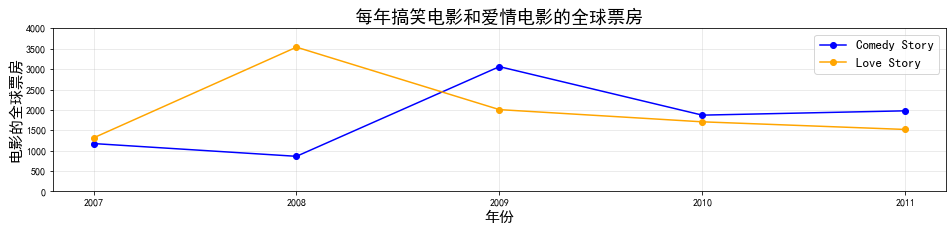

<function matplotlib.pyplot.show(close=None, block=None)>

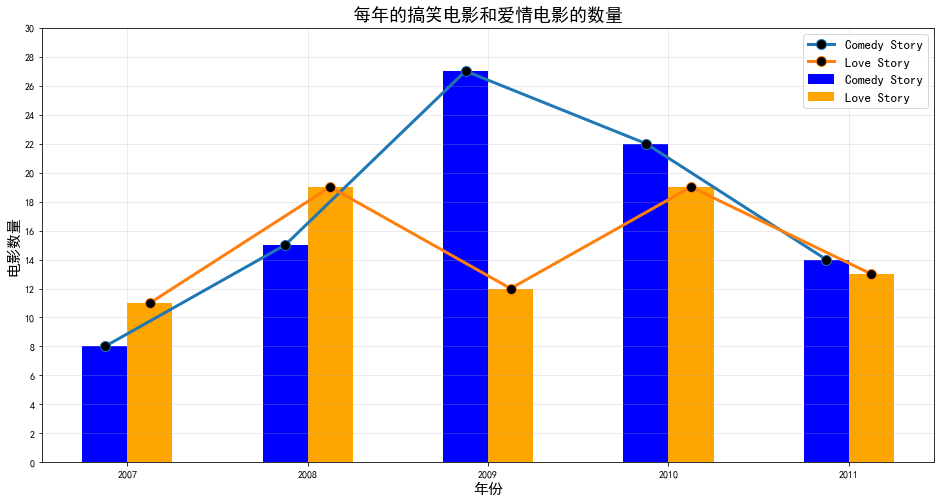

In [22]:
#comparing between comedy and love
#2008中love和comedy都要处理大小写，转换成Comedy和Story
df2008 = df2008.rename(columns={"Film":"Film "})
df2007 = df2007.rename(columns={'Market Profitability':'Profitability'})
df2008 = df2008.rename(columns={'Market Profitability':'Profitability'})
df2009 = df2009.rename(columns={'Market Profitability':'Profitability'})
df2010 = df2010.rename(columns={'Proftitability':'Profitability'})
df2008["Story"] = df2008["Story"].replace(to_replace=["comedy"],value="Comedy")
df2008["Story"] = df2008["Story"].replace(to_replace=["love"],value="Love")

years = [2007,2008,2009,2010,2011]

comedylist = [(df2007[df2007["Story"]=="Comedy"].count()["Film "]),    #每年comedy的数量
              (df2008[df2008["Story"]=="Comedy"].count()["Film "]),
              (df2009[df2009["Story"]=="Comedy"].count()["Film "]),
              (df2010[df2010["Story"]=="Comedy"].count()["Film "]),
              (df2011[df2011["Story"]=="Comedy"].count()["Film "])]

lovelist = [(df2007[df2007["Story"]=="Love"].count()["Film "]),        #每年love的数量
              (df2008[df2008["Story"]=="Love"].count()["Film "]),
              (df2009[df2009["Story"]=="Love"].count()["Film "]),
              (df2010[df2010["Story"]=="Love"].count()["Film "]),
              (df2011[df2011["Story"]=="Love"].count()["Film "])]


comedyworldwidelist = [df2007[df2007['Story']=="Comedy"]["Worldwide Gross"].astype(float).sum(),
                   df2008[df2008['Story']=="Comedy"]["Worldwide Gross"].astype(float).sum(),
                   df2009[df2009['Story']=="Comedy"]["Worldwide Gross"].astype(float).sum(),
                   df2010[df2010['Story']=="Comedy"]["Worldwide Gross"].astype(float).sum(),
                   df2011[df2011['Story']=="Comedy"]["Worldwide Gross"].astype(float).sum()]

loveworldwidelist = [df2007[df2007['Story']=="Love"]["Worldwide Gross"].astype(float).sum(),
                   df2008[df2008['Story']=="Love"]["Worldwide Gross"].astype(float).sum(),
                   df2009[df2009['Story']=="Love"]["Worldwide Gross"].astype(float).sum(),
                   df2010[df2010['Story']=="Love"]["Worldwide Gross"].astype(float).sum(),
                   df2011[df2011['Story']=="Love"]["Worldwide Gross"].astype(float).sum()]
print(comedyworldwidelist)
print(loveworldwidelist)
#利润折线图
plt.figure(figsize=(16,3))
plt.plot(years,comedyworldwidelist,marker="o",label="Comedy Story",c="b")
plt.plot(years,loveworldwidelist,marker="o",label="Love Story",c="orange")
plt.yticks(np.linspace(0,4000,9))
plt.xticks(years)
plt.xlabel("年份",fontsize=15)
plt.ylabel("电影的全球票房",fontsize=15)
plt.title("每年搞笑电影和爱情电影的全球票房",fontsize=18)
plt.grid(alpha=0.3)
plt.legend(fontsize=13)
plt.show()
#数量bar图
plt.figure(figsize=(16,8))
width=0.25
plt.bar([x-width for x in years],comedylist,width=0.25,label="Comedy Story",align="edge",color="b")
plt.bar([x+width for x in years],lovelist,width=-0.25,label="Love Story",align="edge",color="orange")
plt.plot([x-width/2 for x in years],comedylist,label="Comedy Story",marker="o",lw=3,markerfacecolor="k",markersize=10)
plt.plot([x+width/2 for x in years],lovelist,label="Love Story",marker="o",lw=3,markerfacecolor="k",markersize=10)
plt.xticks(years)
plt.yticks(np.linspace(0,30,16))
plt.grid(alpha=0.3)
plt.xlabel("年份",fontsize=15)
plt.ylabel("电影数量",fontsize=15)
plt.title("每年的搞笑电影和爱情电影的数量",fontsize=18)
plt.legend(fontsize=13)
plt.show

# print(df2007["Story"].unique())
# print(df2008["Story"].unique())
# print(df2009["Story"].unique())
# print(df2010["Story"].unique())
# print(df2011["Story"].unique())

# df2007['Profitability'] = pd.to_numeric(df2007['Profitability'][1:].str[:-1].div(100).mask(df['pct_intl_student'] == '%',0))

# .iloc[1:].str.rstrip('%').astype('float') / 100.0).mean()


In [23]:
print("由图可见Comedy主题的电影的全球总收入在2008年后有个大的增长，由1000m以下直接暴增3倍，在2009年的总收入达到了3000m，而后在2010年和2011年\
降了下来维持在2000m左右，但相对于2007年和2009年来看我们可以发现Comedy主题的电影的全球总收入总体来说是呈上涨趋势的。\n")
print("Love主题的电影的全球总收入在2008年有个接近3倍的增长后在2009年减少至2000m左右，其随后两年都呈缓慢下降的趋势。\n")
print("继续深入探究他们全球总受入起落背后的原因，我们可以发现两者在全球总收入和当年发片量的变化是基本吻合的，他们之间有一定的关联的，当发片量多的时候，全球总收入也会增加\
但改变的幅度并没有特定的比例，要具体依据当年相关电影的质量和观众的口味而定,由我们从全年总收入发现的趋势来看，观众近5年间对Comedy主题的电影\
越来越有兴趣，而对Love主题的电影有逐渐不看的现象")



由图可见Comedy主题的电影的全球总收入在2008年后有个大的增长，由1000m以下直接暴增3倍，在2009年的总收入达到了3000m，而后在2010年和2011年降了下来维持在2000m左右，但相对于2007年和2009年来看我们可以发现Comedy主题的电影的全球总收入总体来说是呈上涨趋势的。

Love主题的电影的全球总收入在2008年有个接近3倍的增长后在2009年减少至2000m左右，其随后两年都呈缓慢下降的趋势。

继续深入探究他们全球总受入起落背后的原因，我们可以发现两者在全球总收入和当年发片量的变化是基本吻合的，他们之间有一定的关联的，当发片量多的时候，全球总收入也会增加但改变的幅度并没有特定的比例，要具体依据当年相关电影的质量和观众的口味而定,由我们从全年总收入发现的趋势来看，观众近5年间对Comedy主题的电影越来越有兴趣，而对Love主题的电影有逐渐不看的现象


### 第4题：什么样的电影Profitablity（利润率，其值等于(Worldwide Gross-Budget)/Budget）更高？（4分）

温馨提示：（1）如果你认为不同年份的利润率不可以直接比，那你可能需要对利润率进行简单标准化，方法合理即可。（2）对于“什么样的电影利润率更高”的描述和回答，不一定要求全面，只需要按照你的喜好，选择几个点进行分析即可。

评分要点：（1）数据准备是否完备；（2）可视化是否正确；（3）构图等可视化元素是否合适；（4）可视化结果描述是否合理和到位。

[2.53238, 2.670803225806451, 2.929988235294118, 2.392825641025641, 2.279215625] [4.276725, 3.870311111111112, 1460.3198111111112, 12.126916666666666, 7.94914705882353] [2.9224428571428573, 2.9628000000000005, 2.9771666666666667, 3.4705375, 2.912725] [4.6887428571428575, 3.595484615384615, 2.9407552631578953, 2.5049463414634157, 3.1278103448275862] [4.10125, 2.3010099999999998, 1.7276, 4.539183333333333, 1.75935]


<function matplotlib.pyplot.show(close=None, block=None)>

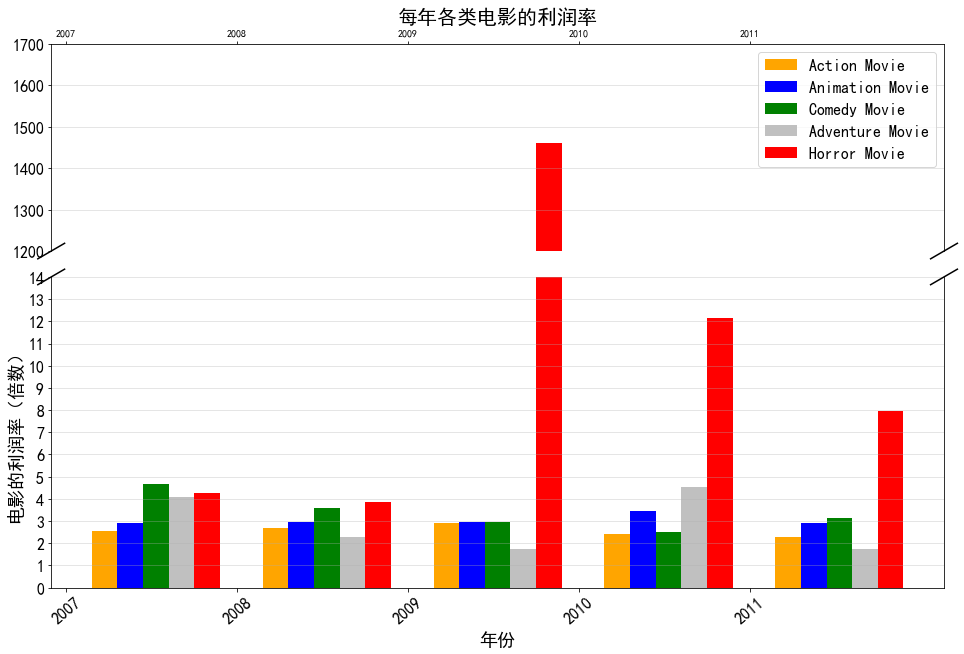

In [24]:
import matplotlib.gridspec as gridspec
#Action,Horror,Animation,Comedy,Adventure/公司
# print(df2007.Genre.unique())
# print(df2008.Genre.unique())
# print(df2009.Genre.unique())
# print(df2010.Genre.unique())
# print(df2011.Genre.unique())
# print(df2007.Story.unique())
# print(df2008.Story.unique())
# print(df2009.Story.unique())
# print(df2010.Story.unique())
# print(df2011.Story.unique())
ActionGenreList = [(df2007[df2007['Genre']=="Action"].Profitability.str.rstrip('%').astype('float') / 100.0).mean(),
                   (df2008[df2008['Genre']=="Action"].Profitability.str.rstrip('%').astype('float') / 100.0).mean(),
                   (df2009[df2009['Genre']=="Action"].Profitability.str.rstrip('%').astype('float') / 100.0).mean(),
                   (df2010[df2010['Genre']=="Action"].Profitability.str.rstrip('%').astype('float') / 100.0).mean(),
                   (df2011[df2011['Genre']=="Action"].Profitability.str.rstrip('%').astype('float') / 100.0).mean()]
HorrorGenreList = [(df2007[df2007['Genre']=="Horror"].Profitability.str.rstrip('%').astype('float') / 100.0).mean(),
                   (df2008[df2008['Genre']=="Horror"].Profitability.str.rstrip('%').astype('float') / 100.0).mean(),
                   (df2009[df2009['Genre']=="Horror"].Profitability.str.rstrip('%').astype('float') / 100.0).mean(),
                   (df2010[df2010['Genre']=="Horror"].Profitability.str.rstrip('%').astype('float') / 100.0).mean(),
                   (df2011[df2011['Genre']=="Horror"].Profitability.str.rstrip('%').astype('float') / 100.0).mean()]
AnimationGenreList = [(df2007[df2007['Genre']=="Animation"].Profitability.str.rstrip('%').astype('float') / 100.0).mean(),
                   (df2008[df2008['Genre']=="Animation"].Profitability.str.rstrip('%').astype('float') / 100.0).mean(),
                   (df2009[df2009['Genre']=="Animation"].Profitability.str.rstrip('%').astype('float') / 100.0).mean(),
                   (df2010[df2010['Genre']=="Animation"].Profitability.str.rstrip('%').astype('float') / 100.0).mean(),
                   (df2011[df2011['Genre']=="Animation"].Profitability.str.rstrip('%').astype('float') / 100.0).mean()]
ComedyGenreList = [(df2007[df2007['Genre']=="Comedy"].Profitability.str.rstrip('%').astype('float') / 100.0).mean(),
                   (df2008[df2008['Genre']=="Comedy"].Profitability.str.rstrip('%').astype('float') / 100.0).mean(),
                   (df2009[df2009['Genre']=="Comedy"].Profitability.str.rstrip('%').astype('float') / 100.0).mean(),
                   (df2010[df2010['Genre']=="Comedy"].Profitability.str.rstrip('%').astype('float') / 100.0).mean(),
                   (df2011[df2011['Genre']=="Comedy"].Profitability.str.rstrip('%').astype('float') / 100.0).mean()]
AdventureGenreList = [(df2007[df2007['Genre']=="Adventure"].Profitability.str.rstrip('%').astype('float') / 100.0).mean(),
                   (df2008[df2008['Genre']=="Adventure"].Profitability.str.rstrip('%').astype('float') / 100.0).mean(),
                   (df2009[df2009['Genre']=="Adventure"].Profitability.str.rstrip('%').astype('float') / 100.0).mean(),
                   (df2010[df2010['Genre']=="Adventure"].Profitability.str.rstrip('%').astype('float') / 100.0).mean(),
                   (df2011[df2011['Genre']=="Adventure"].Profitability.str.rstrip('%').astype('float') / 100.0).mean()]

        
print(ActionGenreList,HorrorGenreList,AnimationGenreList,ComedyGenreList,AdventureGenreList)
# print(df2009[df2009['Genre']=="Horror"].Profitability.str.rstrip('%').astype('float') / 100.0)
a1,a2=2,3


gs = gridspec.GridSpec(2, 1,height_ratios=[a1,a2],hspace=0.1)
plt.figure(figsize=(16,10))

ax = plt.subplot(gs[0,0:])
plt.yticks(fontsize=16)
plt.grid(axis="y",alpha=0.4)
plt.title("每年各类电影的利润率",fontsize=20)

ax2 = plt.subplot(gs[1,0:], sharex=ax)


# plt.subplot(211)
bar_width=0.15

ax.bar([x+bar_width for x in years],ActionGenreList,label="Action Movie",width=bar_width,color="orange",align="edge")
ax.bar([x+bar_width*2 for x in years],AnimationGenreList,label="Animation Movie",width=bar_width,color="b",align="edge")
ax.bar([x+bar_width*3 for x in years],ComedyGenreList,label="Comedy Movie",width=bar_width,color="green",align="edge")
ax.bar([x+bar_width*4 for x in years],AdventureGenreList,label="Adventure Movie",width=bar_width,color="silver",align="edge")
ax.bar([x+bar_width*5 for x in years],HorrorGenreList,label="Horror Movie",color="red",width=bar_width,align="edge")

# ax.plot([x+bar_width for x in years],ActionGenreList,label="Action Movie",color="orange")
# ax.plot([x+bar_width*2 for x in years],AnimationGenreList,label="Animation Movie",color="b")
# ax.plot([x+bar_width*3 for x in years],ComedyGenreList,label="Comedy Movie",color="green")
# ax.plot([x+bar_width*4 for x in years],AdventureGenreList,label="Adventure Movie",color="silver")
# ax.plot([x+bar_width*5 for x in years],HorrorGenreList,label="Horror Movie",color="red",markerfacecolor='k',markersize=12)

ax.legend(["Action Movie","Animation Movie","Comedy Movie","Adventure Movie","Horror Movie"],fontsize=16)


bar_width=0.15
ax2.bar([x+bar_width for x in years],ActionGenreList,label="Action Movie",width=bar_width,color="orange",align="edge")
ax2.bar([x+bar_width*2 for x in years],AnimationGenreList,label="Animation Movie",width=bar_width,color="b",align="edge")
ax2.bar([x+bar_width*3 for x in years],ComedyGenreList,label="Comedy Movie",width=bar_width,color="green",align="edge")
ax2.bar([x+bar_width*4 for x in years],AdventureGenreList,label="Adventure Movie",width=bar_width,color="silver",align="edge")
ax2.bar([x+bar_width*5 for x in years],HorrorGenreList,label="Horror Movie",color="red",width=bar_width,align="edge")


# ax2.plot([x+bar_width for x in years],ActionGenreList,label="Action Movie",color="orange",marker="o")
# ax2.plot([x+bar_width*2 for x in years],AnimationGenreList,label="Animation Movie",color="b",marker="o")
# ax2.plot([x+bar_width*3 for x in years],ComedyGenreList,label="Comedy Movie",color="green",marker="o")
# ax2.plot([x+bar_width*4 for x in years],AdventureGenreList,label="Adventure Movie",color="silver",marker="o")
# ax2.plot([x+bar_width*5 for x in years],HorrorGenreList,label="Horror Movie",color="red",marker="o", markerfacecolor='k',markersize=12)

ax.set_ylim(1200, 1700)  # outliers only
ax2.set_ylim(0, 10)  # most of the data

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
d = .015

oa1,oa2=(a1+a2)/a1,(a1+a2)/a2
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d*oa1, +d*oa1), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d*oa1, +d*oa1), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d*oa2, 1 + d*oa2), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d*oa2, 1 + d*oa2), **kwargs)  # bottom-right diagonal


plt.xlabel("年份",fontsize=18)
plt.ylabel("电影的利润率（倍数）",fontsize=18)
plt.grid(axis="y",alpha=0.4)
plt.xticks(np.arange(2007,2012),fontsize=16,style="italic",rotation=40)
plt.yticks(np.arange(0,15),fontsize=16)


plt.show
# df2009[df2009["Genre"]=="Horror"]


In [25]:
print("可以看到动作、懂话、喜剧、冒险、恐怖这5个题材中，从2007年到2011年除了冒险题材之外，其余的电影的平均利润率都高于200%,值得注意的是\
恐怖片的利润率非常高，2008年和2009年间恐怖片的利润率和其他题材的电影一样维持在正常水平，而2010年恐怖片的平均利润率达到了惊人的1460倍，\
次年也以12倍之高高居榜首，是第二高的冒险片的2.5倍有余，在2011年的平均利润率也是同期第二高的喜剧片的2.5倍，因此我们有理由相信恐怖片的\
利润率更容易高于其他类型的电影，因为恐怖片独占鳌头长达4年之久，其中有3年更是遥遥领先\n")

print("已知恐怖片易得高利润，现来浅析高利润背后的原因")

#下面还有解读，往下看往下看

可以看到动作、懂话、喜剧、冒险、恐怖这5个题材中，从2007年到2011年除了冒险题材之外，其余的电影的平均利润率都高于200%,值得注意的是恐怖片的利润率非常高，2008年和2009年间恐怖片的利润率和其他题材的电影一样维持在正常水平，而2010年恐怖片的平均利润率达到了惊人的1460倍，次年也以12倍之高高居榜首，是第二高的冒险片的2.5倍有余，在2011年的平均利润率也是同期第二高的喜剧片的2.5倍，因此我们有理由相信恐怖片的利润率更容易高于其他类型的电影，因为恐怖片独占鳌头长达4年之久，其中有3年更是遥遥领先

已知恐怖片易得高利润，现来浅析高利润背后的原因


In [26]:
df2009[df2009["Genre"]=="Horror"]

,Film,Lead Studio,Rotten Tomatoes,Audience Score,Story,Genre,Number of Theatres in Opening Weekend,Box Office Average per US Cinema (Opening Weekend),Domestic Gross,Foreign Gross,Worldwide Gross,Budget,Profitability,Opening Weekend,Oscar,Bafta,Source
34,Drag Me to Hell,Universal,92.0,61.0,Monster Force,Horror,2508,6310,42.1,48.70,90.80,30,302.67%,15.8,NaN,NaN,http://www.the-numbers.com/movies/records/allb...
43,Friday the 13th,Paramount,25.0,52.0,Monster Force,Horror,3105,13066,65,26.40,91.40,19,481.05%,40.6,NaN,NaN,http://www.the-numbers.com/movies/records/allb...
49,Halloween II,Independent,20.0,45.0,Escape,Horror,3025,5405,33.39,6.02,39.41,15,262.73%,16.3,NaN,NaN,http://boxofficemojo.com/movies/?id=halloween2...
82,Orphan,Warner Bros.,55.0,65.0,Escape,Horror,2750,4681,41.59,36.74,78.33,30,261.10%,12.8,NaN,NaN,http://www.the-numbers.com/interactive/newsSto...
84,Paranormal Activity,Independent,82.0,56.0,Monster Force,Horror,760,25813,107.92,88.76,196.68,0.015,1311200.00%,19.6,NaN,NaN,http://www.the-numbers.com/movies/records/allb...
92,Saw VI,Independent,40.0,67.0,Escape,Horror,3036,4650,27.69,40.50,68.19,11,619.91%,14.1,NaN,NaN,http://boxofficemojo.com/movies/?id=saw6.htm
94,Sorority Row,Summit,22.0,38.0,Pursuit,Horror,2665,1899,11.97,15.24,27.21,12.5,217.68%,5.1,NaN,NaN,http://boxofficemojo.com/movies/?id=sororityro...
105,The Final Destination,Warner Bros.,29.0,52.0,Escape,Horror,3121,8782,66.5,119.30,185.80,40,464.50%,27.4,NaN,NaN,http://www.the-numbers.com/movies/2009/FDES4.php
125,The Unborn,Relativity Media,11.0,39.0,Monster Force,Horror,2357,8405,42.67,33.84,76.51,16,478.19%,19.8,NaN,NaN,http://boxofficemojo.com/movies/?id=unborn09.htm


In [27]:
df2010[df2010["Genre"]=="Horror"]

,Film,Lead Studio,Rotten Tomatoes,Audience score,Story,Genre,Number of Theatres in Opening Weekend (US),Box Office Average per US Cinema (Opening Weekend),Domestic Gross,Foreign Gross,Worldwide Gross,Budget,Profitability,Opening Weekend,Oscar,Bafta,Source,Unnamed: 17
73,A Nightmare on Elm Street,Warner Bros.,13.0,40.0,Monster Force,Horror,3332,9875,63.08,52.59,115.67,35,330.49%,32.9,NaN,NaN,NaN,NaN
74,Case 39,Independent,23.0,42.0,Monster Force,Horror,2211,2420,13.26,14.93,28.19,26,108.42%,5.4,NaN,NaN,http://boxofficemojo.com/movies,NaN
75,Devil,Independent,52.0,45.0,Monster Force,Horror,2809,4375,33.6,23.23,56.83,10,568.30%,12.3,NaN,NaN,NaN,NaN
76,My Soul to Take,Relativity Media,9.0,29.0,Monster Force,Horror,2572,2660,14.74,5.09,19.83,25,79.32%,6.84,NaN,NaN,NaN,NaN
77,Paranormal Activity 2,Paramount,NaN,NaN,Monster Force,Horror,3216,12649,84.75,92.75,177.5,3,5916.67%,40.67,NaN,NaN,http://boxofficemojo.com/movies/?id=paranormal...,NaN
78,The Crazies,Liberty Starz,72.0,54.0,Monster Force,Horror,2476,6489,39.12,15.47,54.59,20,272.95%,16.07,NaN,NaN,http://boxofficemojo.com/movies/?id=crazies.htm,NaN


In [28]:
print("观察2009年和2010年获得超高利润率的两个电影'Paranormal Activity'和'Paranormal Activity 2'，这两部电影是属于同一公司所出产的同一系列的，\
我们可以发现他在Worldwide Gross中的数据并没有突破性的特出，支撑这两部片子获得超高利润率的因素是他们的低成本，\
一部仅为0.015m而另一部仅为3m,因此我们可断定恐怖片不需要高制作费就可以做出扣人心弦的好电影，\
恐怖题材的电影在拥有好故事的前提下较易以其低成本取得高利润率")



观察2009年和2010年获得超高利润率的两个电影'Paranormal Activity'和'Paranormal Activity 2'，这两部电影是属于同一公司所出产的同一系列的，我们可以发现他在Worldwide Gross中的数据并没有突破性的特出，支撑这两部片子获得超高利润率的因素是他们的低成本，一部仅为0.015m而另一部仅为3m,因此我们可断定恐怖片不需要高制作费就可以做出扣人心弦的好电影，恐怖题材的电影在拥有好故事的前提下较易以其低成本取得高利润率
